In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_csv("datasets/letterdata.csv")

In [3]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.shape

(20000, 17)

##### Separate I/O data

In [7]:
x = df.drop("letter" ,axis =1)
y = df["letter"]

<Axes: xlabel='count', ylabel='letter'>

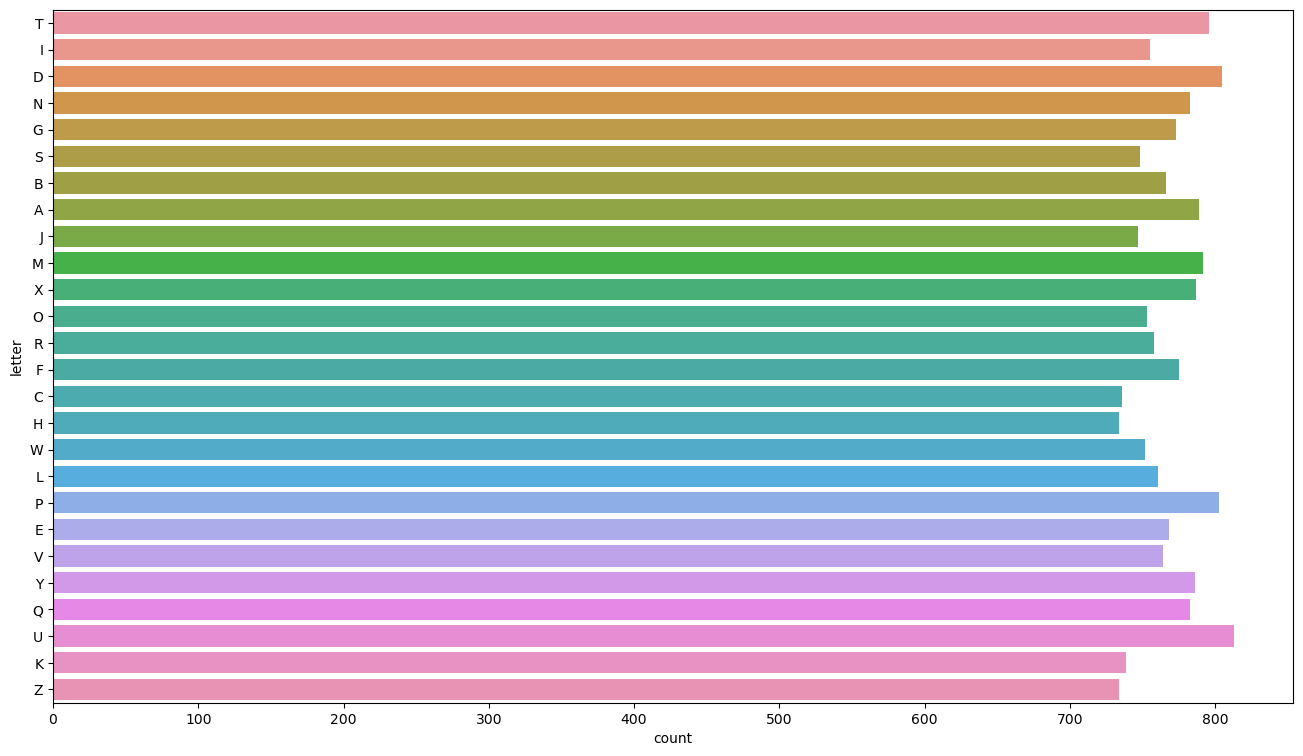

In [10]:
plt.figure(figsize=(16,9))
sns.countplot(y=y)

In [11]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [12]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


##### Cross Validation

In [14]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train ,y_test = train_test_split(x ,y,random_state = 0 ,stratify = y, test_size = 0.20)

In [15]:
x_train.shape

(16000, 16)

In [16]:
x_test.shape

(4000, 16)

##### Build The Model

In [19]:
from sklearn.svm import SVC

In [49]:
svc = SVC(kernel = "sigmoid",random_state = 0 )

In [50]:
svc.fit(x_train ,y_train )

SVC(kernel='sigmoid', random_state=0)

In [51]:
y_pred = svc.predict(x_test)

In [52]:
y_pred

array(['A', 'U', 'L', ..., 'L', 'L', 'E'], dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay

In [54]:
print(confusion_matrix(y_test,y_pred))

[[ 71   0   8   0   1   0   0   0   0   0   0   5   0   0   0   0   7   0
    0   0  66   0   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   0   0   0  87   0   0   0   0   0   0
    0   0  42   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0 130   0   0   0   0   0   0
    0   0   8   0   0   0   0   0]
 [ 26   0   0   0   0   0   0   0   0   0   0  67   0   0   0   0   0   0
    0   0  68   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0   0   0 102   0   0   0   0   0   0
    0   0  27   0   0   0   0   0]
 [ 35   0   0   0   0   0   0   0   0   0   0  29   0   0   0   0   0   0
    0   0  91   0   0   0   0   0]
 [ 23   0   0   0   0   0   0   0   0   0   0 107   0   0   0   0   0   0
    0   0  25   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0  64   0   0   0   0   0   0
    0   0  52   0   0   0   0   0]
 [ 32   0   0   0   0   0   0   0   0   0   0  22   0   0   0   0   0   0
    0   0  97   0   0   0   0   0]
 [ 85   0   0   0  

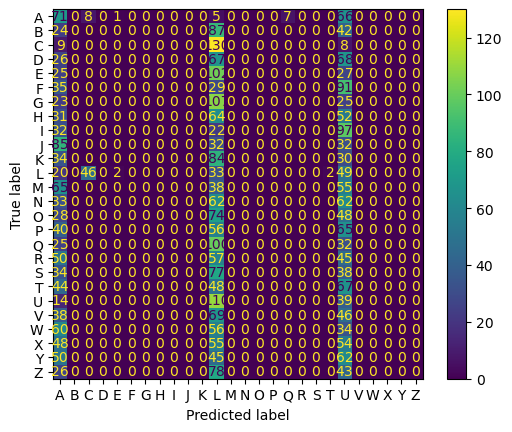

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [56]:
accuracy_score(y_test,y_pred) 

0.03575

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.98      0.96      0.97       158
           B       0.85      0.92      0.89       153
           C       0.94      0.88      0.91       147
           D       0.87      0.96      0.91       161
           E       0.88      0.89      0.89       154
           F       0.90      0.94      0.91       155
           G       0.84      0.94      0.89       155
           H       0.88      0.84      0.86       147
           I       0.99      0.93      0.96       151
           J       0.95      0.93      0.94       149
           K       0.89      0.92      0.90       148
           L       0.99      0.91      0.95       152
           M       0.96      0.96      0.96       158
           N       0.95      0.93      0.94       157
           O       0.89      0.93      0.91       150
           P       1.00      0.86      0.93       161
           Q       0.94      0.92      0.93       157
           R       0.85    

In [57]:
#Linear accuracy = 0.8505
#rbf =0.928
# poly = 0.949
# sigmoid = 0.03575

In [67]:
svc = SVC(kernel = "poly",random_state = 0 )
svc.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [68]:
new = x_test.iloc[[34,675,123,204,332,3567],:]

In [69]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
2211,2,7,4,5,3,12,3,2,2,9,2,9,3,7,3,9
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
10486,1,0,2,0,1,8,6,9,0,6,8,8,5,6,0,8
6354,1,0,2,0,0,7,10,3,1,7,12,8,1,11,0,8
4121,2,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [70]:
svc.predict(new)

array(['R', 'A', 'F', 'M', 'Y', 'P'], dtype=object)

In [71]:
y_test.iloc[[34,675,123,204,332,3567]].values

array(['R', 'A', 'F', 'M', 'Y', 'P'], dtype=object)